https://fivethirtyeight.com/features/can-you-corral-your-hamster/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Riddler Express

# Riddler Classic

In [2]:
def area(perimeter, sides):
    # for the right triangle that makes half of a section
    angle = np.pi / sides
    height = perimeter / sides / 2
    width = height / np.tan(angle)
    return height * width * sides

Use  4 posts for k < 0.08964
Use  5 posts for k < 0.03958
Use  6 posts for k < 0.02102
Use  7 posts for k < 0.01251
Use  8 posts for k < 0.00806
Use  9 posts for k < 0.00550
Use 10 posts for k < 0.00392
Use 11 posts for k < 0.00289
Use 12 posts for k < 0.00219


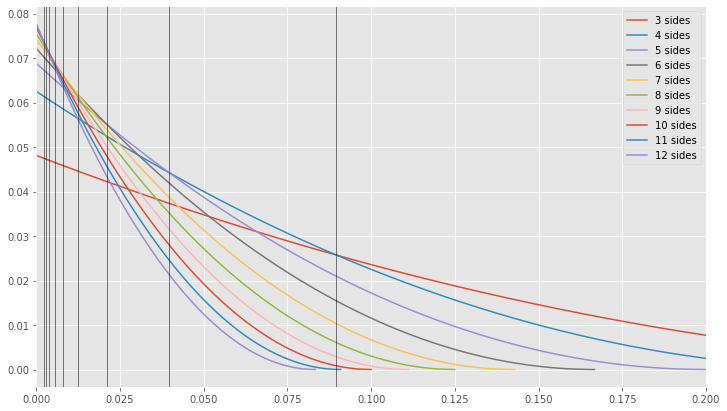

In [3]:
fig, ax = plt.subplots(figsize=(12, 7))
npts = 100000
max_sides = 13
weights = np.linspace(0, 1/3, npts)
areas = np.zeros((max_sides, npts))
for sides in range(3, max_sides):
    perimeters = 1 - sides * weights
    areas[sides] = area(perimeters, sides)
    ax.plot(weights[weights<1/sides],
            areas[sides, weights<1/sides],
            label=f'{sides} sides')
    
for sides in range(3, max_sides-1):
    border = np.where(areas[sides] > areas[sides+1])[0][0]
    ax.axvline(weights[border], color='k', lw=0.5)
    print(f'Use {sides+1:2} posts for k < {weights[border]:.5f}')
ax.legend(loc='upper right')
ax.set_xlim(0, 0.2);
#ax.set_xlim(0, 0.11);
#ax.set_ylim(0.02, 0.075);

We could also solve it numerically.

Starting with

    angle = np.pi / S
    H = P / S / 2
    W = H / np.tan(angle)
    A = H * W * S

that reduces to

$$ A = \frac{P^2}{4 S \tan{\frac{\pi}{S}}}$$ 
